In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
scintillatorType = "FINEclosed"
SourceType = "VJXP401"

#___________________________________

# Scintillator + pixel resolution
if scintillatorType == "STDopen":
    scintillatorSpatialRes = 191
elif scintillatorType == "FINEclosed":
    scintillatorSpatialRes = 127
elif scintillatorType == "HRclosed":
    scintillatorSpatialRes = 113
elif scintillatorType == "ultrafine+":
    scintillatorSpatialRes = 104

#scintillatorSigma_STDopen = 191 # DRZ standard with lens fully open - from Adam
#scintillatorSigma_FINEclosed = 127 # DRZ Fine with lens stopped down - from Adam
#scintillatorSigma_HRopen = 140 # DRZ-HR with lens fully open - from SpDo measurements
#scintillatorSigma_HRclosed = 110.5 # DRZ-HR with lens stopped down - from SpDo measurements FWHM = 2.5 pixels @ pixel size 106 um = 265 um / 2.35 = sigma of 113
#scintillatorSigma_ultrafine+ = 104 # Scintacor UltraFine+ with lens stopped down f/2.2
#scintillatorSigma_hyperfine = 99 # Scintacor Hyperfine with lens stopped down f/2.5

# Focal Spot
if SourceType == "VJXP401":
    focalSpot = 100
    ConeAngle = 40
elif SourceType == "VJXP112":
    focalSpot = 40
    ConeAngle = 30
elif SourceType == "MXRtest":
    focalSpot = 40
elif SourceType == "MXRtheory":
    focalSpot = 25

#focalSpotSigma_VJXP401 = 100 # Need to verify which standard
#focalSpotSigma_80µm = 40 # Need to verify which standard each vendor is using
#focalSpotSigma_50µm = 25 #hypothetical

Optimal Magnification occurs at M=2.0302249999999997.
At optimal magnification, the system PSF will have a standard deviation of 71.2 µm.
This is equal to a FWHM of 167.4 µm. Resolvability = 73.2 µm.
At a magnification of 5, the system PSF will have a standard deviation of 82.5 µm.
This is equal to a FWHM of 194.0 µm. Resolvability = 84.9 µm.
This represents a loss in resolution of 15.9 percent.


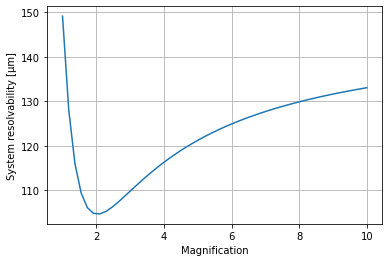

In [4]:
SpotSize = 200
focalSpot = SpotSize/2
scintillatorSpatialRes = 101.5

#focalSpot = focalSpotSigma_80µm
#scintillatorSpatialRes = scinitllatorSigma_STDopen
#magnificationCeiling = 5

#focalSpot = focalSpotSigma_VJXP401
#scintillatorSpatialRes = scintillatorSigma_FINEclosed
magnificationCeiling = 5

M = np.linspace(1,10)
systemSigma = (((scintillatorSpatialRes/M)**2+(focalSpot*(M-1)/(M))**2)**0.5)*2.35/1.6 #added *2.35/1.6*.7 to convert from sigma to resolvability with added correction factor
plt.plot(M,systemSigma)
plt.xlabel("Magnification")
#plt.ylabel("System standard deviation [µm]")
plt.ylabel("System resolvability [µm]")
plt.grid()
optimal_mag = 1+(scintillatorSpatialRes/focalSpot)**2
print(f"Optimal Magnification occurs at M={optimal_mag}.")

optimalSigma = ((scintillatorSpatialRes/optimal_mag)**2+(focalSpot*(optimal_mag-1)/(optimal_mag))**2)**0.5
magnificationCeilingSigma = ((scintillatorSpatialRes/magnificationCeiling)**2+(focalSpot*(magnificationCeiling-1)/(magnificationCeiling))**2)**0.5
print(f"At optimal magnification, the system PSF will have a standard deviation of {optimalSigma:.1f} µm.")
print(f"This is equal to a FWHM of {optimalSigma*2.35:.1f} µm. Resolvability = {optimalSigma*2.35/1.6*.7:.1f} µm.")
print(f"At a magnification of {magnificationCeiling}, the system PSF will have a standard deviation of {magnificationCeilingSigma:.1f} µm.")
print(f"This is equal to a FWHM of {magnificationCeilingSigma*2.35:.1f} µm. Resolvability = {magnificationCeilingSigma*2.35/1.6*.7:.1f} µm.")
print(f"This represents a loss in resolution of {-100+100*magnificationCeilingSigma/optimalSigma:.1f} percent.")


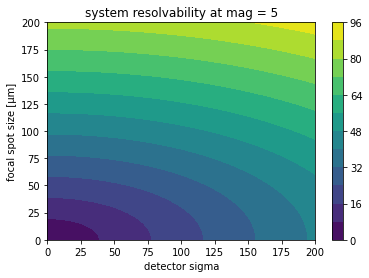

In [6]:
M = 5

xlist = np.linspace(0,200,100) # detector sigma
ylist = np.linspace(0,200,100) # focal spot size (not sigma)
X, Y = np.meshgrid(xlist, ylist)
#Z = ((X/M)**2+(Y/2*(M-1)/(M))**2)**0.5 # in sigma
#Z = (((X/M)**2+(Y/2*(M-1)/(M))**2)**0.5)*2.35 # in FWHM
Z = (((X/M)**2+(Y/2*(M-1)/(M))**2)**0.5)*2.35/1.6*.7 # in resolvability, with correction factor
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z,levels=14)
fig.colorbar(cp)
ax.set_title("system resolvability at mag = 5")
ax.set_xlabel('detector sigma')
ax.set_ylabel('focal spot size [µm]')
plt.show()

(5.0, 10.0)

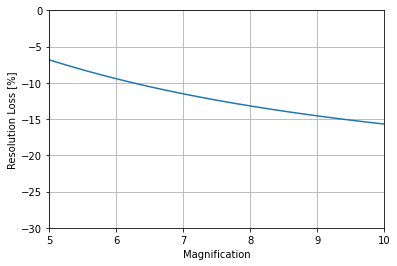

In [22]:
plt.plot(M,100-100*systemSigma/optimalSigma)
plt.grid()
plt.xlabel("Magnification")
plt.ylabel("Resolution Loss [%]")
plt.ylim([-30,0])
plt.xlim([5,10])

Optimal Magnification occurs at M=2.2768999999999995.
At optimal magnification, the system PSF will have a standard deviation of 74.9 µm. This is equal to a FWHM of 176.0.
resolvability = 110.0.
At a magnification of 5, the system PSF will have a standard deviation of 83.1 µm. This is equal to a FWHM of 195.4.
resolvability = 122.1.
This represents a loss in resolution of 11.0 percent.


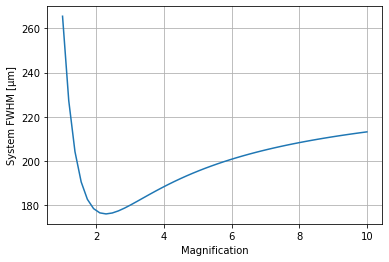

In [50]:
#in FWHM
focalSpot = 100
scintillatorSpatialRes = 113

#focalSpot = focalSpotSigma_80µm
#scintillatorSpatialRes = scinitllatorSigma_STDopen
#magnificationCeiling = 5

#focalSpot = focalSpotSigma_VJXP401
#scintillatorSpatialRes = scintillatorSigma_FINEclosed
magnificationCeiling = 5

M = np.linspace(1,10)
systemSigma = ((scintillatorSpatialRes/M)**2+(focalSpot*(M-1)/(M))**2)**0.5
systemFWHM = systemSigma*2.35
#plt.plot(M,systemSigma)
plt.plot(M,systemFWHM)
plt.xlabel("Magnification")
plt.ylabel("System FWHM [µm]")
plt.grid()
optimal_mag = 1+(scintillatorSpatialRes/focalSpot)**2
print(f"Optimal Magnification occurs at M={optimal_mag}.")

optimalSigma = ((scintillatorSpatialRes/optimal_mag)**2+(focalSpot*(optimal_mag-1)/(optimal_mag))**2)**0.5
magnificationCeilingSigma = ((scintillatorSpatialRes/magnificationCeiling)**2+(focalSpot*(magnificationCeiling-1)/(magnificationCeiling))**2)**0.5
print(f"At optimal magnification, the system PSF will have a standard deviation of {optimalSigma:.1f} µm. This is equal to a FWHM of {optimalSigma*2.35:.1f}.")
print(f"resolvability = {optimalSigma*2.35/1.6:.1f}.")
print(f"At a magnification of {magnificationCeiling}, the system PSF will have a standard deviation of {magnificationCeilingSigma:.1f} µm. This is equal to a FWHM of {magnificationCeilingSigma*2.35:.1f}.")
print(f"resolvability = {magnificationCeilingSigma*2.35/1.6:.1f}.")
print(f"This represents a loss in resolution of {-100+100*magnificationCeilingSigma/optimalSigma:.1f} percent.")

Optimal Magnification occurs at M=4.6480999999999995.


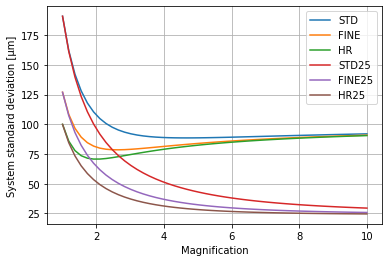

In [26]:
focalSpot = focalSpotSigma_VJXP401
focalSpot2 = focalSpotSigma_50µm
scintillatorSpatialRes = scinitllatorSigma_STDopen
magnificationCeiling = 5

M = np.linspace(1,10)
systemSigma = ((scintillatorSigma_STDopen/M)**2+(focalSpot*(M-1)/(M))**2)**0.5
plt.plot(M,systemSigma)
systemSigma = ((scintillatorSigma_FINEclosed/M)**2+(focalSpot*(M-1)/(M))**2)**0.5
plt.plot(M,systemSigma)
systemSigma = ((scintillatorSigma_HRclosed/M)**2+(focalSpot*(M-1)/(M))**2)**0.5
plt.plot(M,systemSigma)
systemSigma = ((scintillatorSigma_STDopen/M)**2+(focalSpot2*(M-1)/(M))**2)**0.5
plt.plot(M,systemSigma)
systemSigma = ((scintillatorSigma_FINEclosed/M)**2+(focalSpot2*(M-1)/(M))**2)**0.5
plt.plot(M,systemSigma)
systemSigma = ((scintillatorSigma_HRclosed/M)**2+(focalSpot2*(M-1)/(M))**2)**0.5
plt.plot(M,systemSigma)
plt.legend(["STD","FINE","HR","STD25","FINE25","HR25"])
plt.xlabel("Magnification")
plt.ylabel("System standard deviation [µm]")
plt.grid()
optimal_mag = 1+(scintillatorSpatialRes/focalSpot)**2
print(f"Optimal Magnification occurs at M={optimal_mag}.")

In [ ]:
##Effect of lens aperture


In [ ]:
%matplotlib notebook

In [ ]:
detector_width = 216#250#used to be 300, currently the checkerboard crops down to 210
P_x = detector_width/2
detector_height = 423#250#used to be 300, currently the checkerboard crops down to 210
P_y = detector_height/2
detector_diag = np.sqrt(detector_width**2 + detector_height**2)
DSD = 700 #505.838#used to be 800, 505.838
SDD = DSD
detector_half_angle = np.arctan(detector_diag/DSD)*180/np.pi
detector_angle = 2*detector_half_angle

In [ ]:
%matplotlib notebook